#  Module 5: Supervised Machine Learning and Predictive Modeling 

## Lab 2: Hyperparameter tuning for Decision Tree 

## Objective
***

* Hyperparameter tuning in Decision Tree


### Hyperparameter tuning in Decision Tree 
***
Decision tree is a widely-used supervised learning algorithm which is suitable for both classification and regression tasks. Decision trees serve as building blocks for some prominent ensemble learning algorithms such as random forests, GBDT, and XGBOOST.  

On the downside, decision trees are prone to overfitting. They can easily become over-complex which prevents them from generalizing well to the structure in the dataset. In that case, the model is likely to end up overfitting which is a serious issue in machine learning. 

To overcome this issue, we need to carefully adjust the hyperparameters of decision trees. 

In this exercise, we will learn tree visualization with hyperparameters tuning. 

We will use one of the built-in datasets of scikit-learn. The wine dataset contains 13 features (i.e., Columns) on three different wine classes. There are 178 samples (i.e., rows) in the dataset. 

We import the libraries and the load_wine dataset. 

In [1]:
# Loading libraries

import numpy as np
import pandas as pd
from sklearn.datasets import load_wine

# Loading wine dataset

x, y = load_wine(return_X_y=True)

Now we fit the DecisionTreeClassifier model on our dataset. 

In [2]:
# Train a decision tree classifier on wine dataset

from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(x, y)

DecisionTreeClassifier()

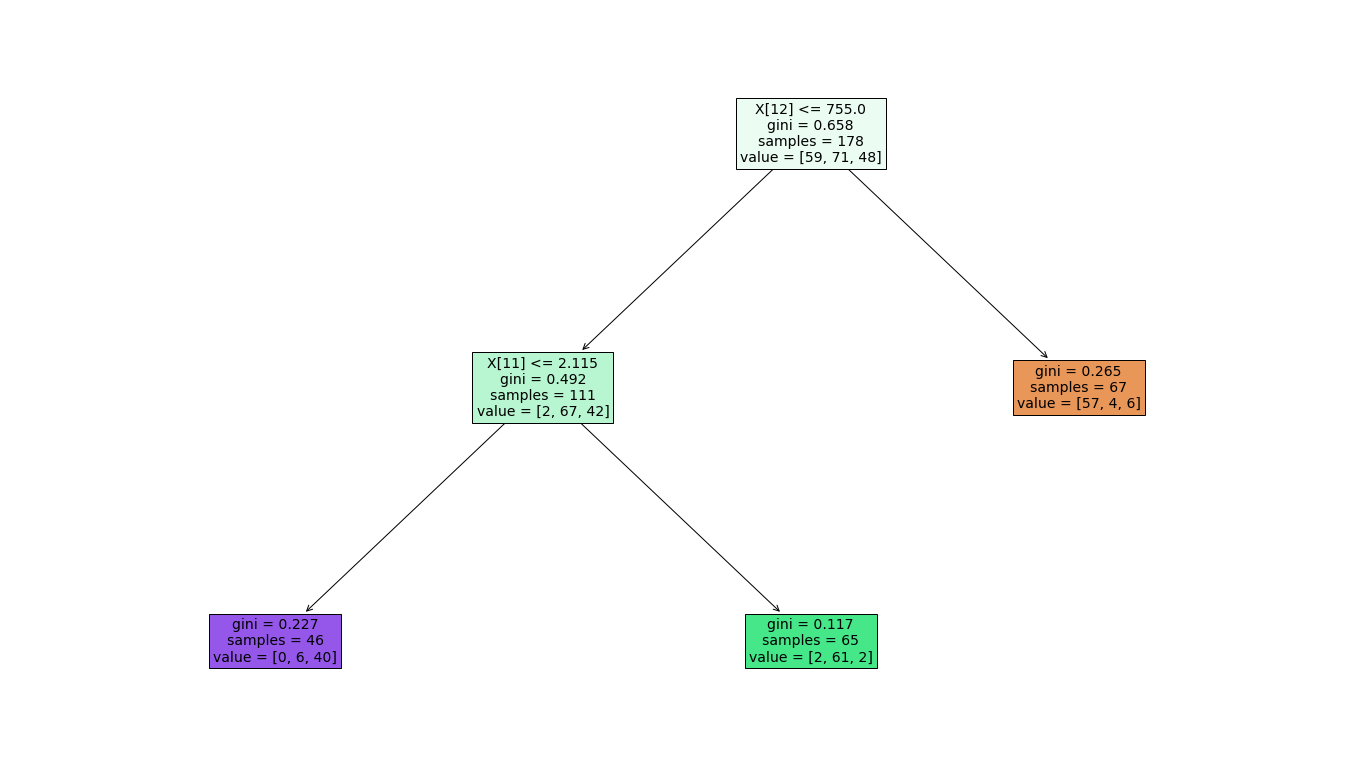

In [12]:
# Visualizing decision tree classifier

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(24,14))
tree.plot_tree(clf, filled=True, fontsize=14)
plt.show()

We observe that the model keeps splitting up until all the nodes are pure (I.e., contains sample from only one class). 

Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. If you take a look the leaf nodes (the nodes at the end of tree), you will see that gini is equal to zero. 

The other function to evaluate the quality of a split is entropy which is a measure of uncertainty or randomness. The more randomness a variable has, the higher the entropy is. 

We usually do not want a tree with all pure leaf nodes. It would be too specific and likely to overfit. 

When the algorithm performs a split, the main goal is to decrease impurity as much as possible. The more the impurity decreases, the more informative power that split gains. As the tree gets deeper, the amount of impurity decrease becomes lower. We can use this to prevent the tree from doing further splits. 

The hyperparameter for this task is **min_impurity_decrease**. It is set to zero by default. Let’s change it and see the difference. 

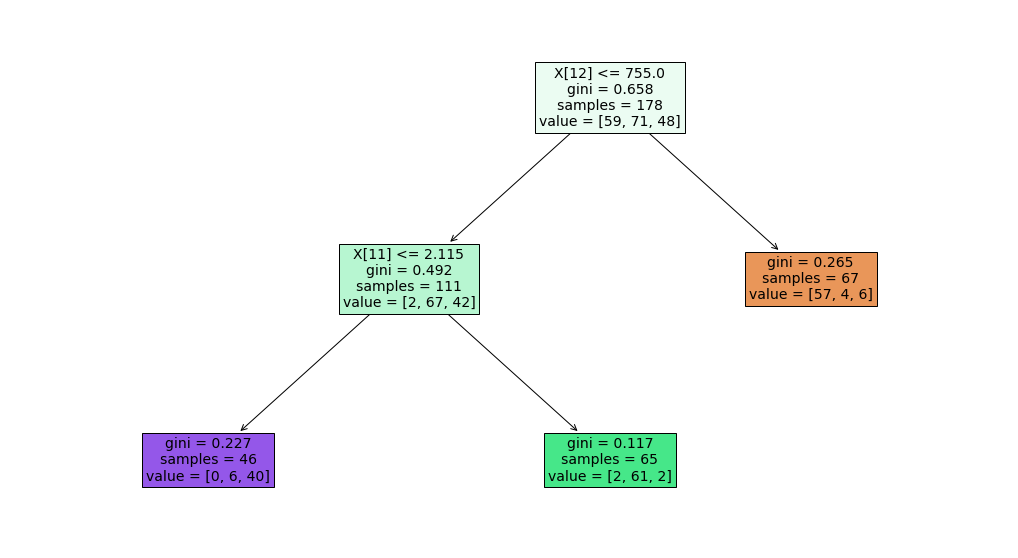

In [13]:
# Customizing min_impurity_decrease

clf = tree.DecisionTreeClassifier(min_impurity_decrease=0.2)
clf.fit(x, y)
plt.figure(figsize=(18,10))
tree.plot_tree(clf, filled=True, fontsize=14)
plt.show()

We now have a much smaller tree. Consider the green node at the bottom. It contains 65 samples and 61 of them belong to one class. There is no need to further split that node because we can afford to have 4 misclassified samples out of 65. If we keep splitting that node, the model will probably be overfitting.  

Min_impurity_split parameter can be used to control the tree based on impurity values. It sets a threshold on gini. For instance, if **min_impurity_split** is set to 0.3, a node needs to have a gini value that is more than 0.3 to be further splitted. 

 

Another hyperparameter to control the depth of a tree is max_depth. It does not make any calculations regarding impurity or sample ratio. The model stops splitting when **max_depth** is reached. 

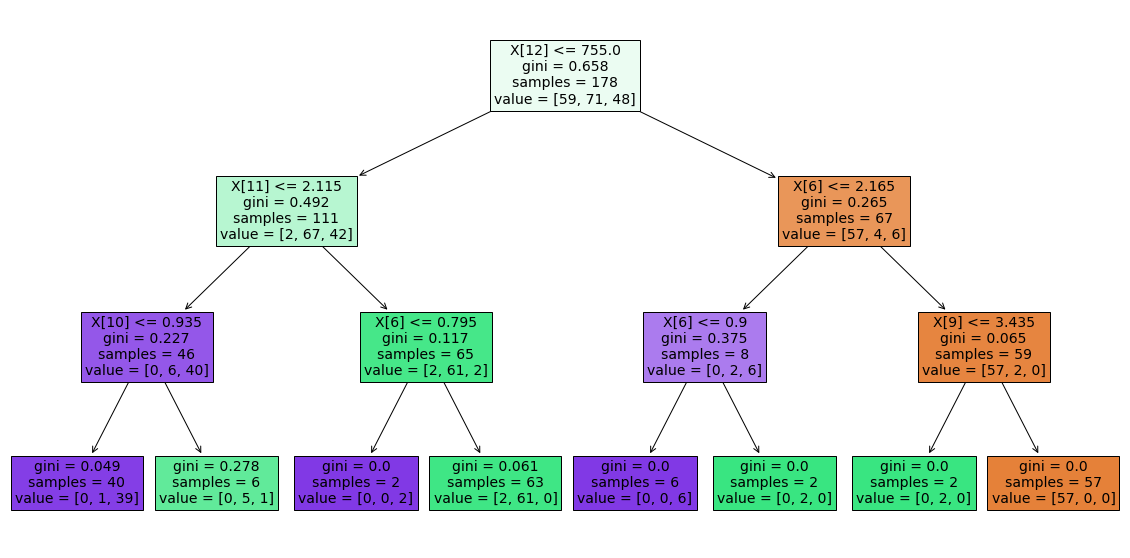

In [14]:
# Tuning max_depth

clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(x, y)
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, fontsize=14)
plt.show()

**Max_depth** is less flexible compared to **min_impurity_decrease**. This actually brings us to another hyperparameter which is **min_samples_leaf**. It indicates the minimum number of samples required to be at a leaf node. We need to be careful when using hyperparameters together. 

 

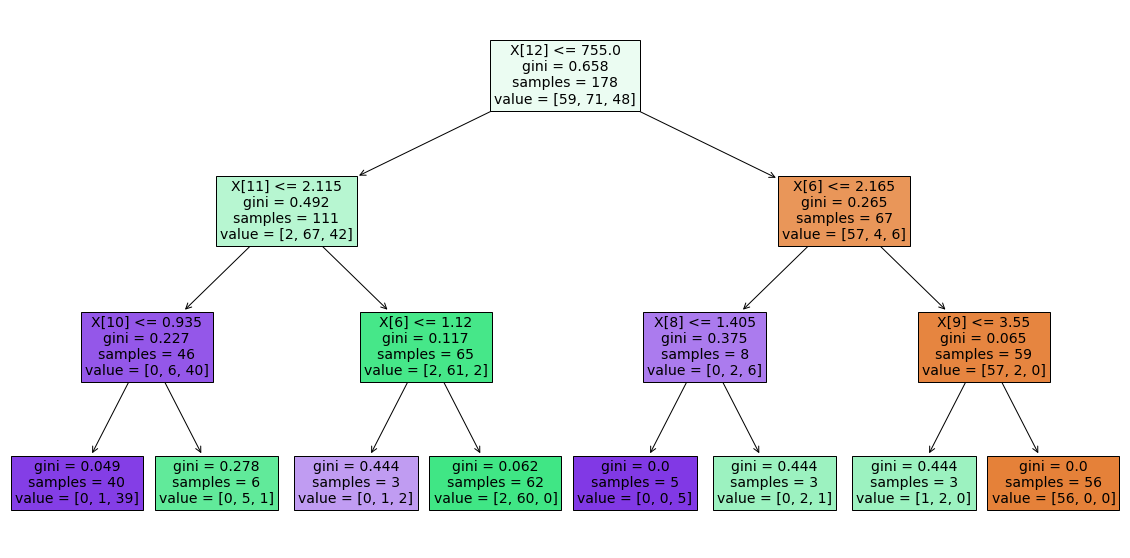

In [15]:
# Tuning max_depth and min_samples_leaf

clf = tree.DecisionTreeClassifier(max_depth=3,min_samples_leaf=3)
clf.fit(x, y)
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, fontsize=14)
plt.show()

In this case, min_samples_leaf is actually harmful for the model. It did not prevent the model from doing that final split. 

We can also limit the number of leaf nodes using **max_leaf_nodes** parameter which grows the tree in best-first fashion until max_leaf_nodes reached. The best split is decided based on impurity decrease. 

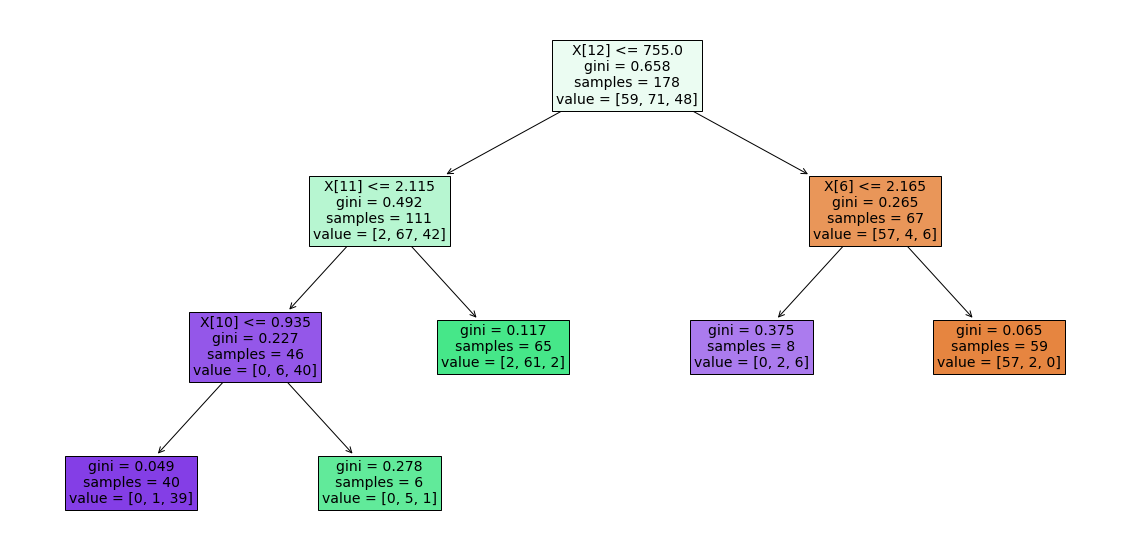

In [16]:
# Tuning max_leaf_nodes

clf = tree.DecisionTreeClassifier(max_leaf_nodes=5)
clf.fit(x, y)
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, fontsize=14)
plt.show()


We end up having a tree with 5 leaf nodes. 

Another important hyperparameter of decision trees is max_features which is the number of features to consider when looking for the best split.  

If not specified, the model considers all of the features. There are 13 features in our dataset. If we set max_features as 5, the model randomly selects 5 features to decide on the next split. Max_features parameter also helps preventing the model from overfitting but it is not enough just to use max_features.  

If we let the model to become too deep, it will end up using all the features anyway.

## Thank You !